# 1. Data Load

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Columns
- 2 개의 숫자 열 :
1. MonthlyCharges : 매월 고객에게 청구되는 금액
2. TotalCharges : 고객에게 청구되는 총 금액

- 19 개의 범주 열 :
1. CustomerID : 각 고객의 고유 한 고객 ID
2. gender : 성별(Female, Male)
3. SenierCitizen : 고객이 노인인지 여부 (1:노인, 0:아님)
4. Partner : 파트너 여부 (Yes, No)
5. Dependents :부양 여부 (Yes, No)
6. tenure : 고객이 회사에 머무른 개월
7. PhoneService : 전화 서비스 여부 (Yes, No)
8. MultipleLines : 고객의 다중 회선 유무 (Yes, No, No phone service)
9. InternetService : 고객의 인터넷 서비스 제공 업체 (DSL, Fiber optic, No)
10. OnlineSecurity :온라인 보안 여부(Yes, No, No internet service)
11. OnlineBackup : 온라인 백업 여부 (Yes, No, No internet service)
12. DeviceProtection 고객이 기기 보호 기능을 제공여부 (Yes, No, No internet service)
13. TechSupport : 기술 지원을 받았는지 (Yes, No, No internet service)
14. StreamingTV :스트리밍 TV여부 (Yes, No, No internet service)
15. StreamingMovies : 스트리밍 영화 여부 (Yes , No, No internet service)
16. contact : 계약 기간 (Month-to-month, One year,Two year)
17. PaperlessBilling :종이 명세서 여부(Yes, No)
18. PaymentMethod : 결제 수단 (Electronic check, Mailed check, Bank transfer (automatic),Credit card (automatic))
19. Churn : 이탈여부 (Yes, No)           

# 2. Null값 처리 및 데이터 전처리


In [4]:
print(data.info(), data.shape,'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(data.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
data = data.drop('customerID', axis=1)
# to_numeric : 똑같은 형식의 숫자로 정렬, errors 옵션 : 숫자 이외의 값을 어떻게 처리할지 설정
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# TotalCharges 컬럼 MonthlyCharges 값으로 대체 하고 null값 확인
data.TotalCharges.fillna(data.MonthlyCharges, inplace=True)
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
payment = {'Electronic check' : 'Electronic', 'Mailed check' : 'Mail', 
           'Bank transfer (automatic)' : 'Bank_tf','Credit card (automatic)':'card'}
data['PaymentMethod'].replace(payment, inplace=True)
data['MultipleLines'].replace('No phone service','No', inplace=True)

In [9]:
# 파생변수 생성
data['AdditionalService'] = (data[['OnlineSecurity','OnlineBackup',
                                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=='Yes').sum(axis=1)
data = data.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis=1)

In [10]:
data['gender'].replace({'Female':1, 'Male':0}, inplace=True)
# Ordinal Encoding
df = {'Month-to-month':3,'One year': 2,'Two year': 1}
data['Contract'] = data.Contract.map(df)

In [11]:
# Label Encoding / Churn : 이탈안함 - 0 , 이탈 - 1
from sklearn.preprocessing import LabelEncoder
def object_to_int(data_ob):
    if data_ob.dtype == 'object':
        data_ob = LabelEncoder().fit_transform(data_ob)
    return data_ob
data = data.apply(lambda x: object_to_int(x))

In [12]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalService
0,1,0,1,0,1,0,0,0,3,1,1,29.85,29.85,0,1
1,0,0,0,0,34,1,0,0,2,0,2,56.95,1889.50,0,2
2,0,0,0,0,2,1,0,0,3,1,2,53.85,108.15,1,2
3,0,0,0,0,45,0,0,0,2,0,0,42.30,1840.75,0,3
4,1,0,0,0,2,1,0,1,3,1,1,70.70,151.65,1,0


# 3. 표준화(StandardScaler)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nor_col = ['tenure','MonthlyCharges','TotalCharges']
data[nor_col] = scaler.fit_transform(data[nor_col])
data[nor_col].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992667
1,0.066327,-0.259629,-0.172198
2,-1.236724,-0.362660,-0.958122
3,0.514251,-0.746535,-0.193706
4,-1.236724,0.197365,-0.938930


In [14]:
data.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AdditionalService
7038,0,0,1,1,-0.340876,1,1,0,2,1,2,0.665992,-0.127637,0,5
7039,1,0,1,1,1.613701,1,1,1,2,1,3,1.277533,2.242641,0,4
7040,1,0,1,1,-0.870241,0,0,0,3,1,1,-1.168632,-0.852985,0,1
7041,0,1,1,0,-1.155283,1,1,1,3,1,2,0.320338,-0.870566,1,0
7042,0,0,0,0,1.369379,1,0,1,1,1,0,1.358961,2.013925,0,5


# 4. Train Test split

In [38]:
from sklearn.model_selection import train_test_split
y = data['Churn']
X = data.drop('Churn',axis=1)
X.shape, y.shape
X_train ,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, random_state=2046)

# smote를 하기전에는 test_size는 0.3 보다 0.2가 성능이 더 좋았으나 smote를 하고 난 후 test_size 0.3이 성능이 더 좋음.
# stratify = y를 적용했을때가 안했을때보다 성능이 조금 더 좋음.

In [40]:
# 데이터 불균형으로 인해서 Oversampling 기법인 SMOTE를 사용함

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2046)
X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4930, 14) (4930,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7244, 14) (7244,)
SMOTE 적용 후 레이블 값 분포: 
 1    3622
0    3622
dtype: int64


# 5. Modeling

# RandomForest

In [17]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix,f1_score

def get_clf_val(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print('오차행렬:\n', confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1_score:{3:.4f}'.format(accuracy,precision,recall,f1))

In [41]:
# SMOTE 하기 전 RandomForest 결과

from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, min_samples_split=8, random_state=2046)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

get_clf_val(y_test,y_pred_rf)

오차행렬:
 [[1417  135]
 [ 262  299]]
정확도 : 0.8121, 정밀도 : 0.6889, 재현율 : 0.5330, f1_score:0.6010


In [42]:
# SMOTE 하고 난 후 RandomForest 결과 (재현율이 더 높아짐)

from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, min_samples_split=8, random_state=2046)
rf.fit(X_train_over, y_train_over)
y_pred_rf = rf.predict(X_test)

get_clf_val(y_test,y_pred_rf)

오차행렬:
 [[1186  366]
 [ 131  430]]
정확도 : 0.7648, 정밀도 : 0.5402, 재현율 : 0.7665, f1_score:0.6338


In [53]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [2,4,6,8,10,12,15], 'min_samples_split': [2,4,8,16,20,24], 'n_estimators' : [100, 300],
    'min_samples_leaf' : [4, 6, 8]}

grid_cv = GridSearchCV(rf, param_grid=params, scoring='recall', cv=5, verbose=1 )
grid_cv.fit(X_train_over , y_train_over)
dt_pred = rf.predict(X_test)
dt_pred_proba = rf.predict(X_test)
print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed: 20.1min finished


GridSearchCV 최고 재현율 수치:0.87
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
# SMOTE 하고 난 후 RandomForest 결과 (재현율이 더 높아짐)

from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=156)
rf.fit(X_train_over, y_train_over)
y_pred_rf = rf.predict(X_test)

get_clf_val(y_test,y_pred_rf)

오차행렬:
 [[1176  376]
 [ 130  431]]
정확도 : 0.7605, 정밀도 : 0.5341, 재현율 : 0.7683, f1_score:0.6301


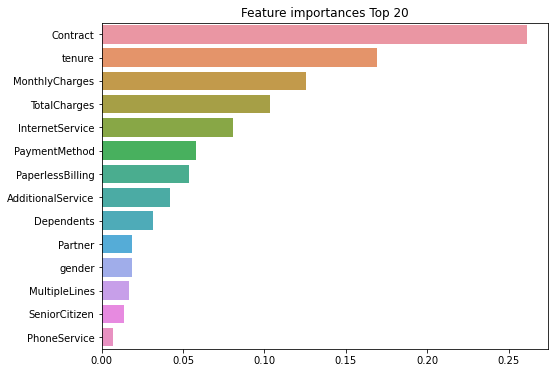

In [57]:
# RandomForest Feature Importances 확인

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()


# Logistic Regression

In [44]:
# SMOTE 하기 전 Logistic Regression 결과

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

get_clf_val(y_test,y_pred_lr)

오차행렬:
 [[1389  163]
 [ 241  320]]
정확도 : 0.8088, 정밀도 : 0.6625, 재현율 : 0.5704, f1_score:0.6130


In [45]:
# SMOTE 하고 난 후 Logistic Regression 결과

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_over, y_train_over)
y_pred_lr = lr_clf.predict(X_test)

get_clf_val(y_test,y_pred_lr)

오차행렬:
 [[1097  455]
 [  99  462]]
정확도 : 0.7378, 정밀도 : 0.5038, 재현율 : 0.8235, f1_score:0.6252


# Naive Bayes Classification

In [46]:
# SMOTE 하기 전 Naive Bayes Classification 결과

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

get_clf_val(y_test,y_pred_nb)

오차행렬:
 [[1172  380]
 [ 144  417]]
정확도 : 0.7520, 정밀도 : 0.5232, 재현율 : 0.7433, f1_score:0.6141


In [47]:
# SMOTE 하고 난 후 Naive Bayes Classification 결과

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_over, y_train_over)
y_pred_nb = nb.predict(X_test)

get_clf_val(y_test,y_pred_nb)

오차행렬:
 [[1063  489]
 [ 105  456]]
정확도 : 0.7189, 정밀도 : 0.4825, 재현율 : 0.8128, f1_score:0.6056


# 서포트 벡터 머신

In [48]:
from sklearn.svm import SVC  

sv_clf = SVC(kernel='linear', degree=5)  
sv_clf.fit(X_train, y_train) 
y_pred_sv = sv_clf.predict(X_test)

get_clf_val(y_test,y_pred_sv)  

오차행렬:
 [[1370  182]
 [ 276  285]]
정확도 : 0.7832, 정밀도 : 0.6103, 재현율 : 0.5080, f1_score:0.5545


In [49]:
from sklearn.svm import SVC  

sv_clf = SVC(kernel='linear', degree=5)  
sv_clf.fit(X_train_over, y_train_over) 
y_pred_sv = sv_clf.predict(X_test)

get_clf_val(y_test,y_pred_sv) 

오차행렬:
 [[1042  510]
 [  86  475]]
정확도 : 0.7179, 정밀도 : 0.4822, 재현율 : 0.8467, f1_score:0.6145


In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_sv = GridSearchCV(sv_clf,param_grid=params, scoring='recall', cv=5, verbose=1)
grid_sv.fit(X_train_over,y_train_over)
sv_pred = sv_clf.predict(X_test)
sv_pred_proba = sv_clf.predict(X_test)
print('GridSearchCV 최고 재현율 수치:{0:.2f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
